In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def plot_ts(time, series):
    plt.plot(time, series)
    plt.xlabel("Time")
    plt.ylabel("Value")
    plt.grid(True)

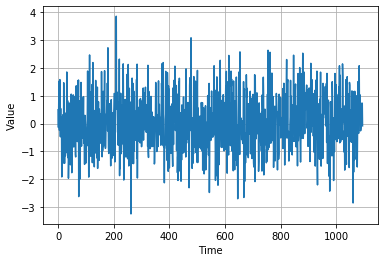

In [3]:
def noise(time, level=1, seed=42):
    rs = np.random.RandomState(seed)
    return rs.randn(len(time)) * level

time = np.arange(365 * 3 + 1)
ts_noise = noise(time)
plot_ts(time, ts_noise)

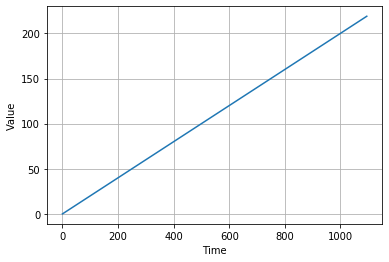

In [4]:
def trend(time, slope):
    return slope * time

ts_trend = trend(time, 0.2)
plot_ts(time, ts_trend)

In [5]:
def cos(period):
    t = np.arange(period) / period
    return np.cos(2 * np.pi * t)

def composition(period):
    t = np.arange(period) / period
    return np.where(t < 0.4, np.cos(2 * np.pi * t), 1 / np.exp(3 * t))
    
def seasonality(time, period, gen=cos, amplitude=1):
    seasonal_data = gen(period)
    return np.resize(seasonal_data * amplitude, len(time))

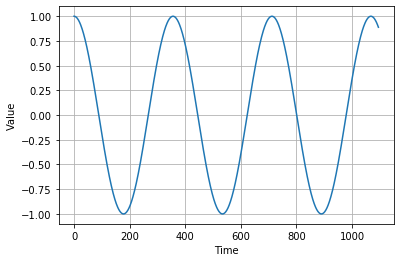

In [6]:
ts_seasonality_cos = seasonality(time, 356, cos)
plot_ts(time, ts_seasonality_cos)

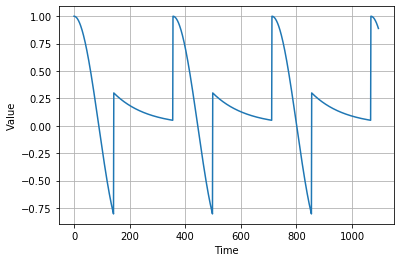

In [7]:
ts_seasonality_composition = seasonality(time, 356, composition)
plot_ts(time, ts_seasonality_composition)

In [8]:
ts = 10 + trend(time, slope=0.05) \
    + seasonality(time, period=365, gen=composition, amplitude=40) \
    + noise(time, level=5, seed=42)

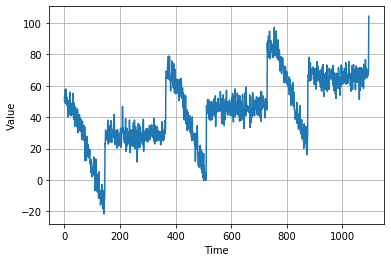

In [9]:
plot_ts(time, ts)